1. Sử dụng linear regression xây dựng mô hình dự đoán thời gian đến nơi trễ (arr_delay) dựa vào thời gian xuất phát trễ (dep_delay) và khoảng cách (distance)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
raw_data = np.genfromtxt(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B7\flight-data\nycflights.csv', dtype=str, delimiter=',', encoding='utf-8')

Mô hình là 1.01823X1 + -0.00256X2+(-3.20305)
2 biến giải thích 83.71% kết quả thời gian đến nơi trễ
Độ lệch của khoảng lỗi 1.898


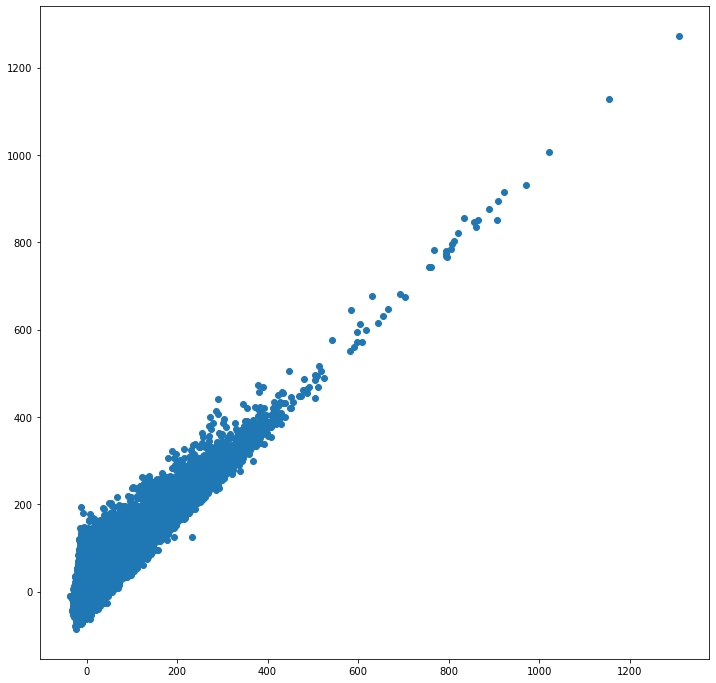

In [21]:
#Create variables
title = raw_data[0,:]
index_location = np.where(title=='"origin"')[0][0]
arrdelay = raw_data[1:,np.where(title == '"arr_delay"')[0][0]]
def model(location):
    def delay(location):
        if location == 'all': return arrdelay[np.where(arrdelay!= 'NA')].astype(float)
        elif location == "EWR": return arrdelay[np.where((arrdelay!= 'NA')&(raw_data[1:,index_location]=='"EWR"'))].astype(float)
        elif location == "JFK": return arrdelay[np.where((arrdelay!= 'NA')&(raw_data[1:,index_location]=='"JFK"'))].astype(float)
        elif location == "LGA": return arrdelay[np.where((arrdelay!= 'NA')&(raw_data[1:,index_location]=='"LGA"'))].astype(float)

    delay_distance = raw_data[1:,[np.where(title == '"dep_delay"')[0][0],np.where(title == '"distance"')[0][0]]]
    x = delay_distance[np.where(arrdelay !='NA')].astype(float)

    # Tạo các indices ngẫu nhiên
    # np.random.seed(10)
    rand_indices = np.arange(y.size)
    np.random.shuffle(rand_indices)

    # Chia dữ liệu ra thành 2 tập train và test
    N_TRAIN = int(y.size * 0.8)
    train_indices = rand_indices[0:N_TRAIN]
    test_indices = rand_indices[N_TRAIN:]
    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    # Tạo
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train, y_train)
    x = model.coef_
    b = model.intercept_
    # # Dự đoán
    # print(np.sum(model.coef_*x_train[0]) + model.intercept_)
    # delay = model.predict([x_train[0]]).squeeze()
    print(f'Mô hình là {x[0]:.5f}X1 + {x[1]:.5f}X2+({b:.5f})')
    #Đánh giá R2
    r2 = model.score(x_train, y_train)
    print(f'2 biến giải thích {r2*100:.2f}% kết quả thời gian đến nơi trễ')

    # Mong đợi Tỷ lệ lỗi 5%
    y_predict = model.predict(x_train)
    err = y_predict - y_train
    print(f'Độ lệch của khoảng lỗi {np.mean(abs(err))/np.mean(y):.3f}')

    # Đồ thị biến động của điểm dự báo so với thực tế
    plt.figure(figsize=[12,12]) 
    plt.scatter(y_predict, y_train)
    plt.show()
model('all')

Mô hình là 1.01757X1 + -0.00256X2+(-3.18428)
2 biến giải thích 83.87% kết quả thời gian đến nơi trễ
Độ lệch của khoảng lỗi 1.898


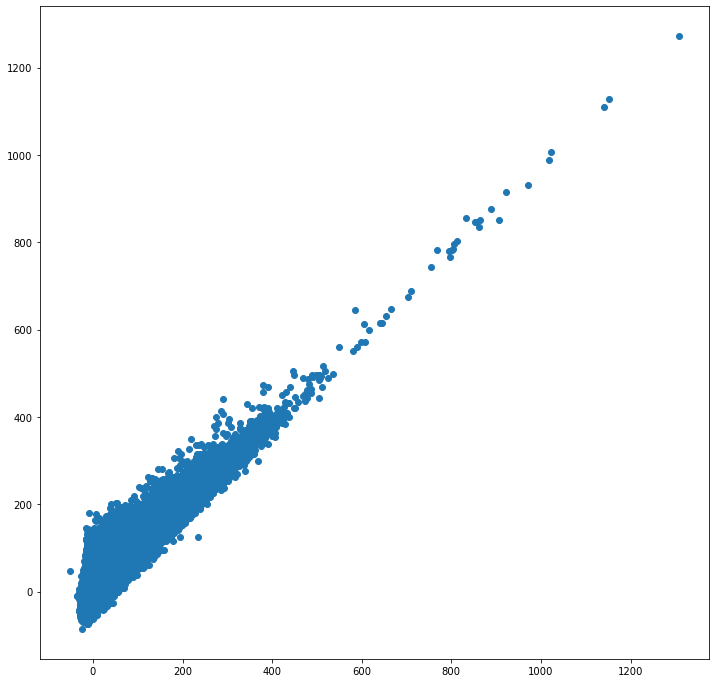

In [22]:
model("EWR")

Mô hình là 1.01798X1 + -0.00258X2+(-3.15487)
2 biến giải thích 83.86% kết quả thời gian đến nơi trễ
Độ lệch của khoảng lỗi 1.898


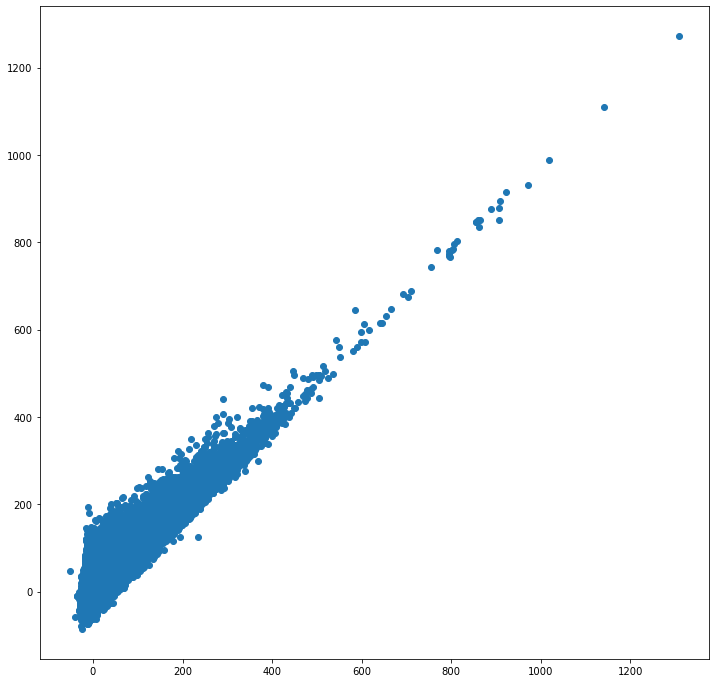

In [23]:
model("JFK")

Mô hình là 1.01770X1 + -0.00257X2+(-3.20235)
2 biến giải thích 83.83% kết quả thời gian đến nơi trễ
Độ lệch của khoảng lỗi 1.898


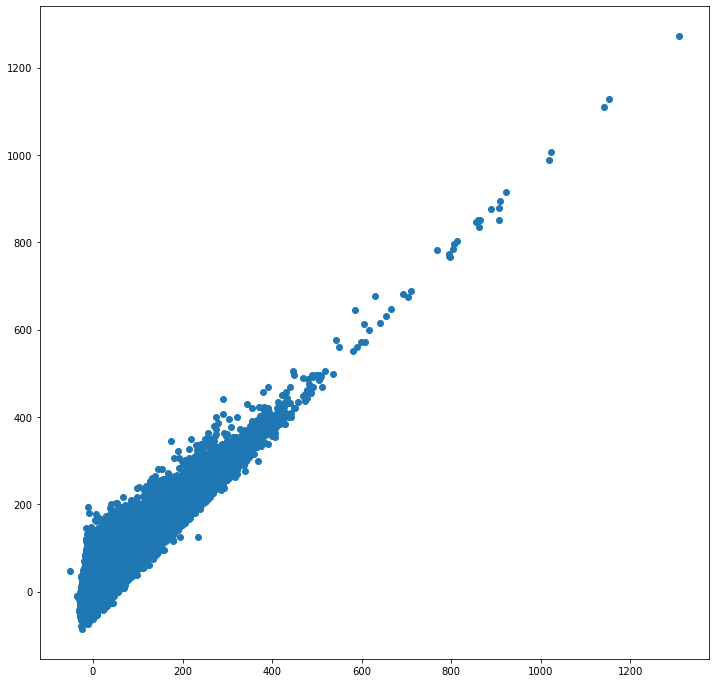

In [24]:
model("LGA")

Độ chính xác chia theo khu vực bay, về cơ bản giống so với mẫu tổng thể.